
# Project: Investigate European Soccer Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The objective of this project is to utilize European Soccer Dataset (obtained from:  https://www.kaggle.com/hugomathien/soccer) to perform data analysis using SQLite and Python.

In [106]:
# Use this cell to set up import statements for all of the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from scipy import stats

<a id='wrangling'></a>
## Data Wrangling

> Most data aggregation has been performed in SQLITE with queries included below. The dataset provided match results, player       attributes and team attributes for time period 2008-2016.
  
####  This query was used to produce player_pen_rating.csv:
>  SELECT Player.player_api_id, Player.player_name,
>		sum(Player_Attributes.penalties) tot_penalties, AVG(Player_Attributes.overall_rating) avg_overall_rating

>  FROM Player_Attributes

>  JOIN Player

>  ON player.player_api_id = Player_Attributes.player_api_id

>  GROUP BY 1;

####These two queries were used to produce Team_attributes_wincount.csv:
>  SELECT Team.team_api_id,
	Team.team_long_name,
	AVG(Team_Attributes.buildUpPlayDribbling),
	AVG(Team_Attributes.buildUpPlayPassing),
	AVG(Team_Attributes.buildUpPlaySpeed),
	AVG(Team_Attributes.chanceCreationCrossing),
	AVG(Team_Attributes.chanceCreationPassing),
	AVG(Team_Attributes.chanceCreationShooting),
	AVG(Team_Attributes.defenceAggression),
	AVG(Team_Attributes.defencePressure),
	AVG(Team_Attributes.defenceTeamWidth),
	Win_teamid_count.Tot_win_count

>  FROM Team

>  JOIN Team_Attributes ON Team.team_api_id = Team_Attributes.team_api_id

>  JOIN Win_teamid_count ON Team.team_api_id = Win_teamid_count.winning_team_id

>  GROUP BY 1;


>  CREATE TABLE Win_teamid_count AS

>  SELECT CASE WHEN match.home_team_goal > match.away_team_goal THEN HTeam.team_api_id	

>		ELSE ATeam.team_api_id END AS winning_team_id,

>       COUNT(1) AS Tot_win_count

>  FROM match

>  JOIN Team AS HTeam on HTeam.team_api_id = match.home_team_api_id

>  JOIN Team AS ATeam on ATeam.team_api_id = Match.away_team_api_id

>  GROUP BY 1;


#### This query was used to produce match_teamwin_count.csv:
>  SELECT  Strftime('%Y',Match.date) game_date,
>		CASE WHEN match.home_team_goal > match.away_team_goal THEN HTeam.team_long_name	
>		ELSE ATeam.team_long_name END AS winning_team_name,
>		COUNT(2) AS tot_win_count		

>  FROM Match

>  JOIN Team AS HTeam on HTeam.team_api_id = Match.home_team_api_id

>  JOIN Team AS ATeam on ATeam.team_api_id = Match.away_team_api_id

>  GROUP BY 1,2;

#### This query was used to produce match_goal_country.csv:
>  SELECT Country.name AS country_name, Strftime('%Y',Match.date) game_date,home_team_goal, away_team_goal 

>  FROM Match LEFT JOIN Country ON match.country_id = Country.id;

<a id='eda'></a>
## Exploratory Data Analysis

> The data is analyzed to answer three 1D and 2D questions: top players who had most penalties, average overall rating over the time period, what team attributes lead to  most victories, which teams improved over the time period, has goal difference changed over time and home advantange changed over time.

### Who are top 10 players that had most penalties?

In [107]:
# Load your data and print out a few lines. Perform operations to inspect data
df_player_pen_rat = pd.read_csv('player_pen_rating.csv')
df_player_pen_rat.info()
print(50*'-')
print(df_player_pen_rat.head(5))
print(50*'-')
print(df_player_pen_rat.describe())
print(50* '-')
print(df_player_pen_rat.isnull().sum(axis=0))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 4 columns):
player_api_id         11060 non-null int64
player_name           11060 non-null object
tot_penalties         11060 non-null int64
avg_overall_rating    11060 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 345.7+ KB
--------------------------------------------------
   player_api_id        player_name  tot_penalties  avg_overall_rating
0           2625  Patryk Rachwal,18            867           60.142857
1           2752        Diego Mainz            744           69.380952
2           2768        Jose Dorado            670           69.285714
3           2770   Ignacio Gonzalez            959           71.133333
4           2790        Alberto Rey            277           70.200000
--------------------------------------------------
       player_api_id  tot_penalties  avg_overall_rating
count   11060.000000   11060.000000        11060.000000
mean   156582

That's great all players have penalties and overall rating data, no missing values.

In [108]:
#Identify top 10 players who had most cumulative penalties
top_pen_player = df_player_pen_rat.sort_values(by=['tot_penalties'],ascending=False)
top_pen_player.head(10)

,player_api_id,player_name,tot_penalties,avg_overall_rating
4087,41269,Alessio Cerci,4314,78.607143
5808,108808,Mario Balotelli,4120,81.760870
4247,41890,Claudio Marchisio,3984,82.566038
1327,26472,Michael Bradley,3813,76.759259
1029,25772,Zdravko Kuzmanovic,3799,74.784314
1902,30731,Andrea Pirlo,3791,84.644444
1660,27734,Antonio Di Natale,3767,81.755556
1830,30626,Thierry Henry,3712,79.458333
3969,40930,Adrien Silva,3682,76.250000
4703,47394,Adel Taarabt,3650,77.320000



> No surprises with most penalties as top 2 are forwards.

### Who are the top 10 players with highest averaged overall ratings for time period 2008-2016?

In [109]:
#identify top 10 players with highest average overall ratings 
top_overall_players = df_player_pen_rat.sort_values(by=['avg_overall_rating'],ascending=False)
top_overall_players.head(10)

,player_api_id,player_name,tot_penalties,avg_overall_rating
2038,30981,Lionel Messi,2084,92.192308
1979,30893,Cristiano Ronaldo,2090,91.280000
2006,30924,Franck Ribery,1956,88.458333
2021,30955,Andres Iniesta,1778,88.320000
2793,35724,Zlatan Ibrahimovic,1848,88.285714
1940,30834,Arjen Robben,2037,87.840000
3769,39854,Xavi Hernandez,1721,87.636364
1936,30829,Wayne Rooney,2964,87.222222
1846,30657,Iker Casillas,948,86.954545
1980,30894,Philipp Lahm,2167,86.733333


Wow!  The data shows Messi and Ronaldo in the lead.  This is consistent with soccer fifa ratings.

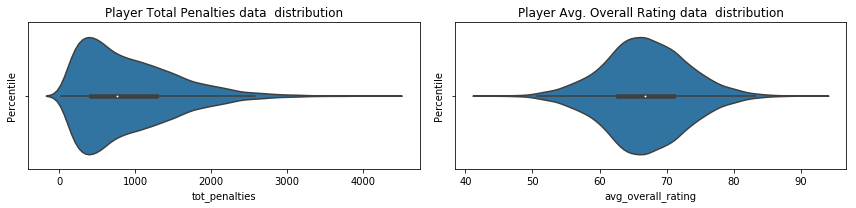

In [110]:
#Let's use violin plots to examine the players' data distribution for total penalties and 
#overall rating averaged over 2008-2016 period.
fig1,ax1 = plt.subplots(nrows = 1,ncols = 2)
fig1.set_size_inches(w=12,h=3)
sns.violinplot(x=df_player_pen_rat['tot_penalties'],ax = ax1[0])
ax1[0].set(ylabel = 'Percentile',title = 'Player Total Penalties data  distribution')
sns.violinplot(x=df_player_pen_rat['avg_overall_rating'],ax= ax1[1])
ax1[1].set(ylabel = 'Percentile',title = 'Player Avg. Overall Rating data  distribution')
fig1.tight_layout()

The plots above show data distribtion of players cumulative penalties and avgerage overall ratings. The penalties data seems right skewed and overall ratings data seems to be normally distributed.  This plot make sense as only some players tend to 
get penalties often.  As for the overall ratings, on average most player performace seems to be average!

### What team attributes lead to most victories?

In [111]:
#read team attribute and wincount data and inspect data 
df_team_att_win = pd.read_csv('Team_attributes_wincount.csv')

print(df_team_att_win.shape)
print(50* '-')
print(df_team_att_win.info())
print(50* '-')
print(df_team_att_win.isnull().sum(axis=0))

(288, 12)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 12 columns):
team_api_id                                    288 non-null int64
team_long_name                                 288 non-null object
AVG(Team_Attributes.buildUpPlayDribbling)      262 non-null float64
AVG(Team_Attributes.buildUpPlayPassing)        288 non-null float64
AVG(Team_Attributes.buildUpPlaySpeed)          288 non-null float64
AVG(Team_Attributes.chanceCreationCrossing)    288 non-null float64
AVG(Team_Attributes.chanceCreationPassing)     288 non-null float64
AVG(Team_Attributes.chanceCreationShooting)    288 non-null float64
AVG(Team_Attributes.defenceAggression)         288 non-null float64
AVG(Team_Attributes.defencePressure)           288 non-null float64
AVG(Team_Attributes.defenceTeamWidth)          288 non-null float64
Tot_win_count                                  288 non-null int64
dtypes: float64(9), int

In [112]:
#check if something wrong with data with null values
df_team_att_win.loc[df_team_att_win['AVG(Team_Attributes.buildUpPlayDribbling)'].isnull(),:].head(26)

,team_api_id,team_long_name,AVG(Team_Attributes.buildUpPlayDribbling),AVG(Team_Attributes.buildUpPlayPassing),AVG(Team_Attributes.buildUpPlaySpeed),AVG(Team_Attributes.chanceCreationCrossing),AVG(Team_Attributes.chanceCreationPassing),AVG(Team_Attributes.chanceCreationShooting),AVG(Team_Attributes.defenceAggression),AVG(Team_Attributes.defencePressure),AVG(Team_Attributes.defenceTeamWidth),Tot_win_count
5,2183,P. Warszawa,NaN,44.250000,32.750000,49.750000,48.000000,59.250000,40.750000,49.500000,51.500000,78
8,4170,US Boulogne Cote D'Opale,NaN,34.000000,48.000000,59.000000,39.000000,58.333333,53.000000,50.000000,67.000000,12
10,6351,KAS Eupen,NaN,55.000000,50.000000,55.000000,50.000000,55.000000,50.000000,50.000000,55.000000,10
14,6421,Leixões SC,NaN,30.000000,30.000000,50.000000,50.000000,65.000000,30.000000,30.000000,30.000000,21
16,6493,AC Bellinzona,NaN,52.000000,43.500000,51.500000,55.000000,55.000000,50.000000,38.500000,55.500000,37
29,7955,Neuchâtel Xamax,NaN,47.333333,54.333333,55.333333,45.333333,49.000000,40.333333,44.333333,52.666667,50
31,8020,Polonia Bytom,NaN,44.000000,38.000000,34.000000,40.500000,61.500000,62.000000,56.500000,55.000000,99
39,8031,Polonia Bytom,NaN,44.000000,38.000000,34.000000,40.500000,61.500000,62.000000,56.500000,55.000000,35
53,8242,Odra Wodzisław,NaN,45.000000,30.000000,40.000000,45.000000,70.000000,70.000000,70.000000,65.000000,21
64,8322,Arka Gdynia,NaN,41.000000,38.000000,48.500000,39.000000,61.000000,59.000000,56.000000,57.500000,34


Approximately 10% of the teams have buildupplay dribbling ratings aggreagate data is missing, however rest of the data columns are ok.  It is best to drop this column as the data comparison may get skewed.


In [113]:
#drop the AVG(Team_Attributes.buildUpPlayDribbling) column and inspect the data again
df_team_att_win_new = df_team_att_win.drop(['AVG(Team_Attributes.buildUpPlayDribbling)'],axis=1)
df_team_att_win_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
team_api_id                                    288 non-null int64
team_long_name                                 288 non-null object
AVG(Team_Attributes.buildUpPlayPassing)        288 non-null float64
AVG(Team_Attributes.buildUpPlaySpeed)          288 non-null float64
AVG(Team_Attributes.chanceCreationCrossing)    288 non-null float64
AVG(Team_Attributes.chanceCreationPassing)     288 non-null float64
AVG(Team_Attributes.chanceCreationShooting)    288 non-null float64
AVG(Team_Attributes.defenceAggression)         288 non-null float64
AVG(Team_Attributes.defencePressure)           288 non-null float64
AVG(Team_Attributes.defenceTeamWidth)          288 non-null float64
Tot_win_count                                  288 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 24.8+ KB


In [114]:
# remove "AVG(Team_Attributes."  and trailing ")" from column names
new_column_labels = []
for col in df_team_att_win_new.columns:
    if 'AVG(Team_Attributes.' in col:
        new_column_labels.append(col[20:-1]) 
    else:
        new_column_labels.append(col)

# assign new labels to columns in dataframe
df_team_att_win_new.columns = new_column_labels
df_team_att_win_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
team_api_id               288 non-null int64
team_long_name            288 non-null object
buildUpPlayPassing        288 non-null float64
buildUpPlaySpeed          288 non-null float64
chanceCreationCrossing    288 non-null float64
chanceCreationPassing     288 non-null float64
chanceCreationShooting    288 non-null float64
defenceAggression         288 non-null float64
defencePressure           288 non-null float64
defenceTeamWidth          288 non-null float64
Tot_win_count             288 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 24.8+ KB


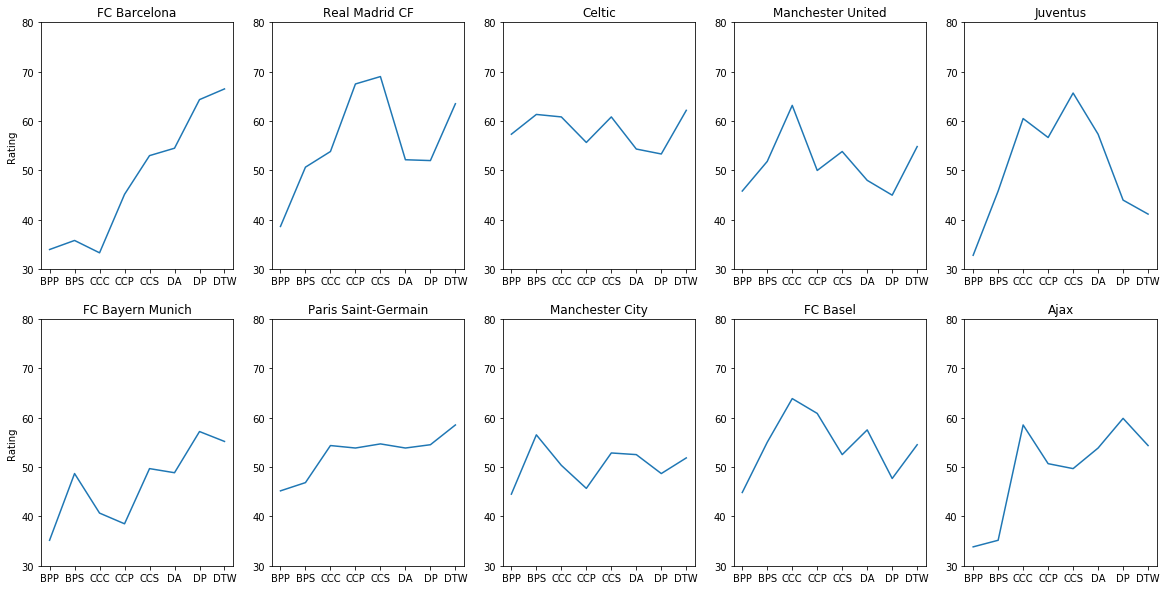

In [115]:
#sort data for top 10 winning teams and plot attribute data
top_team_df = df_team_att_win_new.sort_values(by=['Tot_win_count'],ascending=False)
top_teams = top_team_df.head(10)
#x_val = top_teams.columns[2:-1]  #This labeling for the x-axis too long.
x_val = ['BPP','BPS','CCC','CCP','CCS','DA','DP','DTW']
y_val = []
sub_plt_no = 1
plt.figure(figsize=(20,10))
for index,team in top_teams.iterrows():
    y_val = team[2:-1]   
    ax2 = plt.subplot(2,5,sub_plt_no)
    ax2.set_ylim(30,80)
    plt.plot(x_val, y_val)
    if sub_plt_no == 1 or sub_plt_no == 6:
        ax2.set(ylabel='Rating')
    plt.title(team.team_long_name)
    sub_plt_no += 1
    
plt.show() 


Above are plots of individual team attribute name vs. team attribute score for each of the top ten most victorious teams.
This analysis is performed to see if a single attribute is a strong predictor of most victories.  No single dimension jumps out. 
DTW-Defense Team Width seems to be of highest rating for 3 out of ten most victorious but that is not good enough for any correlations.

### What teams improved over time?

In [116]:
#read match wins aggregate data and inspect data
df_match_byyr = pd.read_csv('match_teamwin_count.csv')
df_match_byyr.info()
df_match_byyr['winning_team_name'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 3 columns):
game_date            1843 non-null int64
winning_team_name    1843 non-null object
tot_win_count        1843 non-null int64
dtypes: int64(2), object(1)
memory usage: 43.3+ KB


296

In [117]:
#find slope for each team win over time 
team_names = df_match_byyr['winning_team_name'].unique()
team_slope =  []
for team in team_names:
    df = df_match_byyr.query('winning_team_name == @team')
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['game_date'],df['tot_win_count'])
    team_slope.append(slope)
    

In [118]:
#sort the team slopes and print out the top 5 team names
df_slope = pd.DataFrame(team_names,columns=['team'])
df_slope['slope'] = team_slope
df_top_slopes = df_slope.sort_values(by=['slope'],ascending=False) 
print('Here are the 5 teams that improved the most')
print(df_top_slopes.head(5))
print()
print('Compare most improved from dataset to top 2 teams from previous results')
df_top_slopes.query('team == "FC Barcelona" or team == "Real Madrid CF"')

Here are the 5 teams that improved the most
                     team  slope
285                 Carpi    9.0
209  Xerez Club Deportivo    8.0
11                Amadora    6.0
292               Tondela    6.0
280        Leicester City    6.0

Compare most improved from dataset to top 2 teams from previous results


,team,slope
136,Real Madrid CF,0.566667
44,FC Barcelona,0.216667


The tables above show the slope of linear regression of team wins vs time.  There is a big difference bet most victorious teams' improvement slope (not as steep) and most improved teams' improvement slopes are very steep.  

### How has goal difference changed over time?

In [119]:
#read match wins aggregate data and inspect data
df_match_goal_country = pd.read_csv('match_goal_country.csv')
print(df_match_goal_country.shape)
print(50*'-')
print(df_match_goal_country.info())
print(50*'-')
print(df_match_goal_country.isnull().sum(axis=0))
print(50*'-')
print(df_match_goal_country.head(5))


(25979, 4)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 4 columns):
country_name      25979 non-null object
game_date         25979 non-null int64
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
dtypes: int64(3), object(1)
memory usage: 811.9+ KB
None
--------------------------------------------------
country_name      0
game_date         0
home_team_goal    0
away_team_goal    0
dtype: int64
--------------------------------------------------
  country_name  game_date  home_team_goal  away_team_goal
0      Belgium       2008               1               1
1      Belgium       2008               0               0
2      Belgium       2008               0               3
3      Belgium       2008               5               0
4      Belgium       2008               1               3


Great, no missing data.  Let's proceed with analysis.

In [120]:
#Calculate absolute goal difference and inspect dataframe 
df_match_goal_country['goal_diff'] = abs((df_match_goal_country.home_team_goal - df_match_goal_country.away_team_goal))
df_match_new = df_match_goal_country
df_match_new.head()

,country_name,game_date,home_team_goal,away_team_goal,goal_diff
0,Belgium,2008,1,1,0
1,Belgium,2008,0,0,0
2,Belgium,2008,0,3,3
3,Belgium,2008,5,0,5
4,Belgium,2008,1,3,2


In [121]:
#Find how much data available for each country
df_match_new.groupby('country_name').count()

,game_date,home_team_goal,away_team_goal,goal_diff
country_name,,,,
Belgium,1728,1728,1728,1728
England,3040,3040,3040,3040
France,3040,3040,3040,3040
Germany,2448,2448,2448,2448
Italy,3017,3017,3017,3017
Netherlands,2448,2448,2448,2448
Poland,1920,1920,1920,1920
Portugal,2052,2052,2052,2052
Scotland,1824,1824,1824,1824


The table above shows that England, France, Italy and spain have most match data.

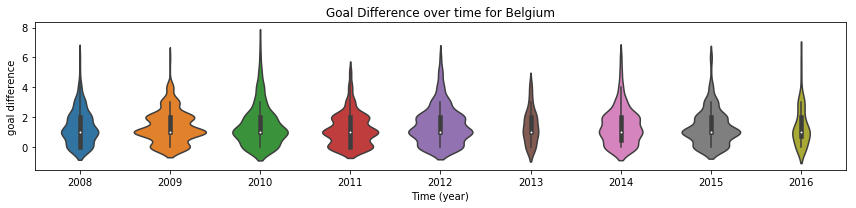

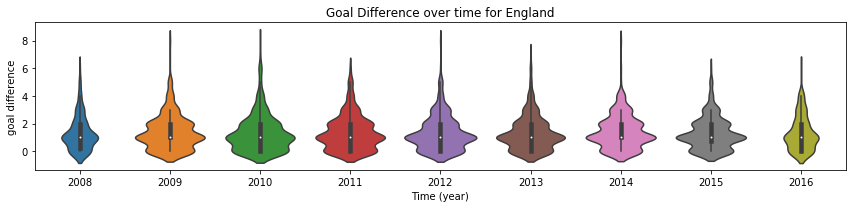

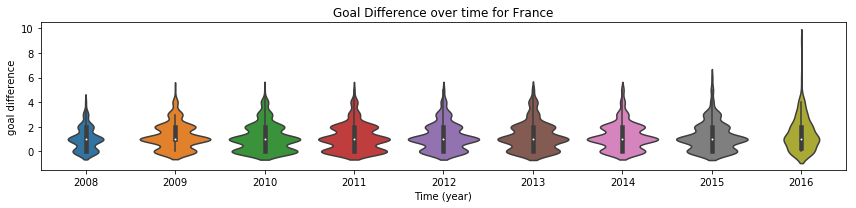

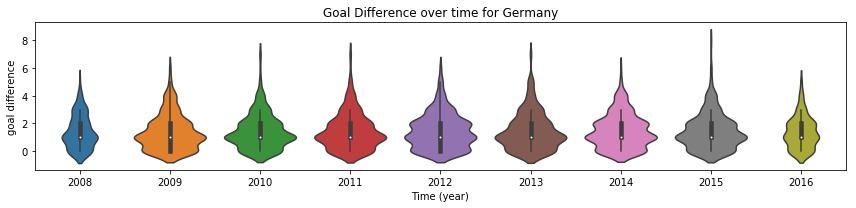

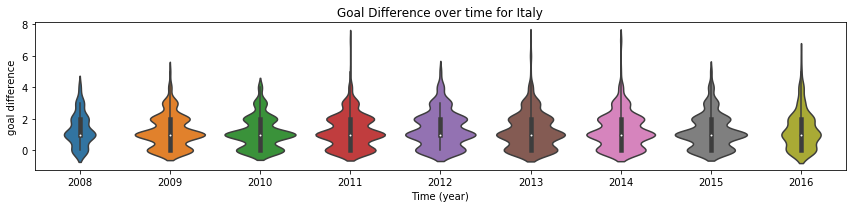

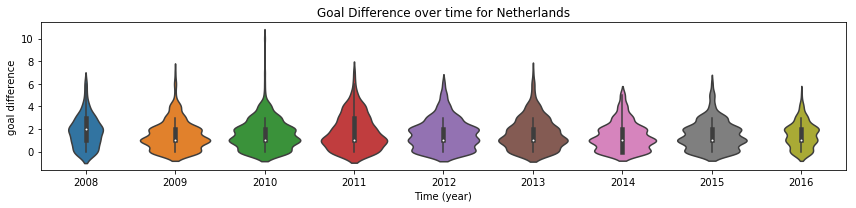

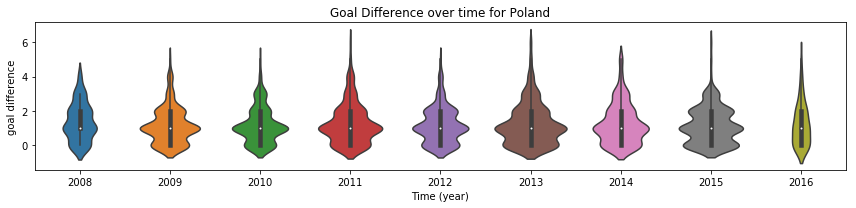

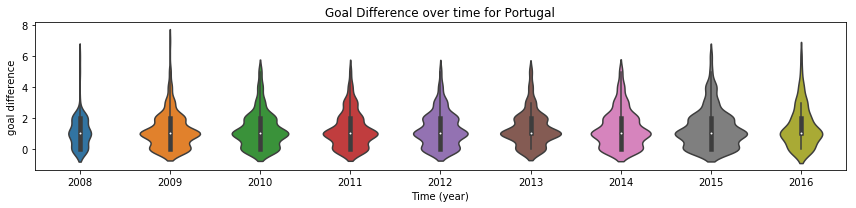

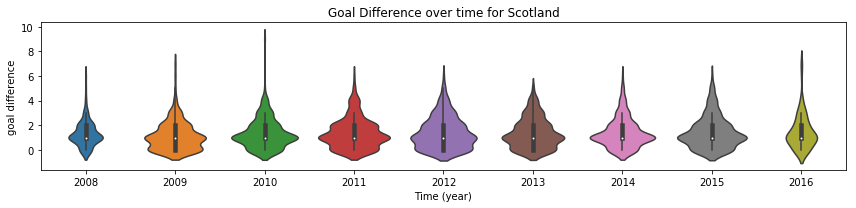

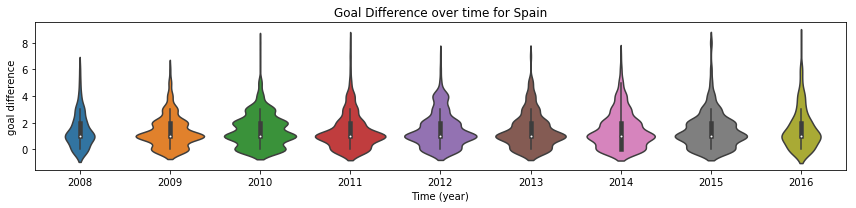

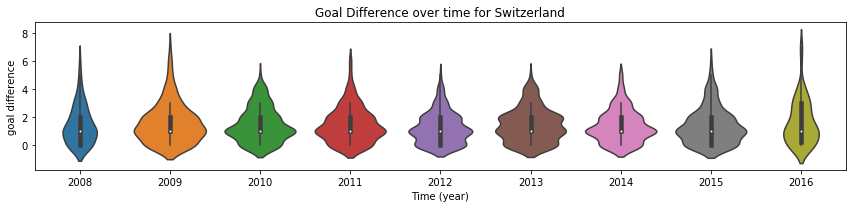

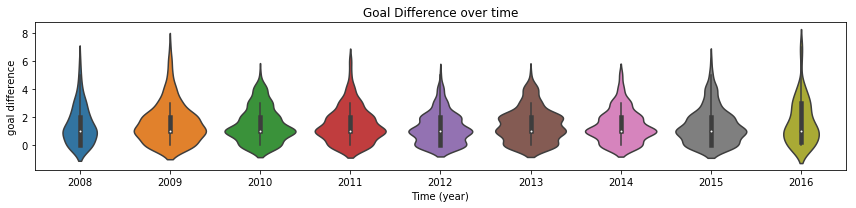

In [122]:
#Let's use violin plots to examine goal_diff vs time per country

for country in df_match_new['country_name'].unique():
    df = df_match_new.query('country_name == @country')
    plt_title = 'Goal Difference over time for ' + country
    fig3,ax3 = plt.subplots(nrows = 1,ncols = 1)
    fig3.set_size_inches(w=12,h=3)
    sns.violinplot(x=df['game_date'],y=df['goal_diff'],scale = 'count')
    ax3.set(xlabel = 'Time (year)',ylabel = 'goal difference',title = plt_title ) 
    fig3.tight_layout()


fig3,ax3 = plt.subplots(nrows = 1,ncols = 1)
fig3.set_size_inches(w=12,h=3)
sns.violinplot(x=df['game_date'],y=df['goal_diff'],scale = 'count')
ax3.set(xlabel = 'Time (year)',ylabel = 'goal difference',title = 'Goal Difference over time' ) 
fig3.tight_layout()    


The plots above show Goal difference over time for each country and entire dataset.  Interestlingly, there is less data available for 2008 and 2016 than other years.  Most data seems to fall between 0-3 goal difference over time period.


### How has home win, losses and draw stats changed over time?

In [123]:
#display match stats for further analysis
df_match_goal_country.info()
df_match_goal_country.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 5 columns):
country_name      25979 non-null object
game_date         25979 non-null int64
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
goal_diff         25979 non-null int64
dtypes: int64(4), object(1)
memory usage: 1014.9+ KB


,country_name,game_date,home_team_goal,away_team_goal,goal_diff
0,Belgium,2008,1,1,0
1,Belgium,2008,0,0,0
2,Belgium,2008,0,3,3
3,Belgium,2008,5,0,5
4,Belgium,2008,1,3,2


In [124]:
#calculate home wins, losses and draw stats
df_match_goal_country['home_wins'] = (df_match_goal_country['home_team_goal'] > df_match_goal_country['away_team_goal'])
df_match_goal_country['home_losses'] = (df_match_goal_country['home_team_goal'] < df_match_goal_country['away_team_goal'])
df_match_goal_country['home_draws'] = (df_match_goal_country['home_team_goal'] == df_match_goal_country['away_team_goal'])


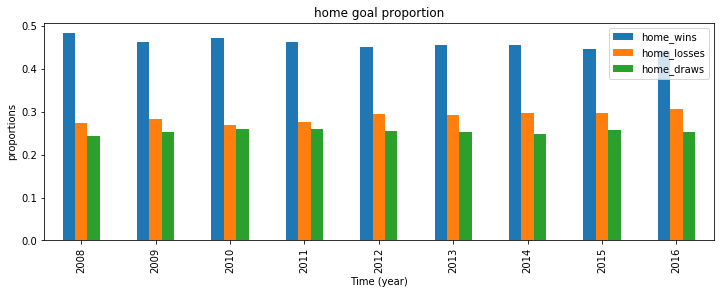

In [125]:
#calculate home proportions and plot
df_home = df_match_goal_country.groupby('game_date')['home_wins','home_losses','home_draws'].mean()
ax1 = df_home.plot(title = "home goal proportion", kind='bar',figsize=(12,4))
ax1.set_xlabel("Time (year)")
ax1.set_ylabel("proportions")
plt.show()

The plot above shows home wins, losses and draws proportions.  A strong case for home advantage but it has slightly decreased
over time.  

<a id='conclusions'></a>
## Conclusions

>The objective of this analysis was to use SQL and Python to analyze the soccer dataset downloaded from kaggle.  The dataset is normalized, self-explanatory and extensive.  It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. The dataset is stored in SQLite database.  Upon downloading the DB Browser and dataset, I examined relationships between different tables. The SQLite queries are listed in the Data Wrangling section.

>There are a few dataset limitations that hindered the analysis. First different amount of data is available for each country, time and players, hence doing across these dimensions may not be as accurate.  There was also a lot of missing data for one of the player attribute, I decided to exclude this dimension from analysis.

>I chose to calculate total number of penalties given for each player to find the players with most penalties.  The data showed that most penalties given to Alessio Cerci, who is a forward for Italian National team.  This is not conclusive but noteworthy that the forwards are taught to be selfish and aggressive at putting the ball in the net.  This trait may result in penalties.   

>Next I chose to calculate average overall score per player for the entire time period.  I think this is the best way to find the best overall player for 2008-2016 period.  Messi followed closely by Ronaldo are the best overall players.  This outcome is concurrent with the fifa information.  

>Next I chose to assess the team attribute data to find the traits that lead to most victorious teams.  I first calculated total wins for each team and then merged it with average team attributes data for teams using SQLite.  Next python was used to sort the data in descending order for total wins and plot top ten most victorious teams.  First look at the plots there is no obvious one trait however, a careful examination shows the Defense Team Width and Chance Creation Shooting are top two consistent traits correlated to victory.  This is probably a good correlation as the game of soccer has evolved, defensive play has become just as important as scoring.  Wide team width helps with making it difficult for the opposition to pull them out of shape and hence less chance to score.  The higher chance creation shooting indicates higher opportunities created for shooting...higher opportunities lead to higher probability to score.

>On to 2D, I examined the match data for which teams improved the most.  For this I used SQLite to calculate total wins for each team per each year for temporal simple regression analysis (to calculate slope of the line for total wins vs. time (year) each team).  The steepest slope would mean that scoring improved most over time.  The game of soccer requires consistent improvement but may not mean increase number of wins, but scoring is the ultimate goal!  This analysis shows Carpi with slope of 9.  Just out of curiosity I chose to compare Carpi slope to that of top two winning teams (FC Barcelona and Real Madrid CF).  The top two winning teams had fairly flat slope comparatively.  This goes to show that the top teams may have developed the best training routines and acquired the best kits, coaches and (alas) players over time and hence the winning is consistent.  Hence, most improved may not mean most victorious team.  

>Second 2D analysis was for how goal difference changes over time.  There were discrepancies in amounts of data available for each country, so I decided to look at each country differently, and then all data.  Most data seems to fall between 0-3 goal difference over time period.  

>Third 2D analysis was done check for home advantage over time.  As the analysis showed, teams win home games by approximately 45% of times, the advantage has decreased slightly from 2008 to 2016.  Interesting, I wonder what the betting community
thinks and if enacts with this knowledge.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])